In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

In [6]:
# Load dataset
digits = load_digits()
df = pd.DataFrame(digits.data)
df['target'] = digits.target

--- EDA on Digits Dataset ---
Shape of the data: (1797, 65)
Data types:
 0         float64
1         float64
2         float64
3         float64
4         float64
           ...   
60        float64
61        float64
62        float64
63        float64
target      int32
Length: 65, dtype: object
Missing values:
 0         0
1         0
2         0
3         0
4         0
         ..
60        0
61        0
62        0
63        0
target    0
Length: 65, dtype: int64
Summary statistics:
             0            1            2            3            4  \
count  1797.0  1797.000000  1797.000000  1797.000000  1797.000000   
mean      0.0     0.303840     5.204786    11.835838    11.848080   
std       0.0     0.907192     4.754826     4.248842     4.287388   
min       0.0     0.000000     0.000000     0.000000     0.000000   
25%       0.0     0.000000     1.000000    10.000000    10.000000   
50%       0.0     0.000000     4.000000    13.000000    13.000000   
75%       0.0     0.00000

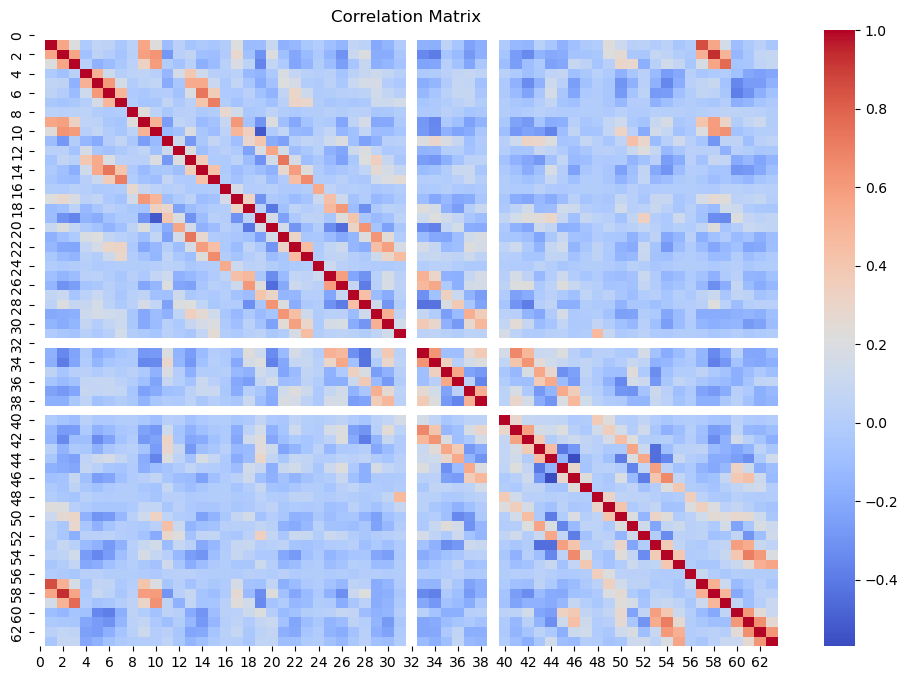

In [8]:
# Exploratory Data Analysis (EDA)
def eda(data):
    print("Shape of the data:", data.shape)
    print("Data types:\n", data.dtypes)
    print("Missing values:\n", data.isnull().sum())
    print("Summary statistics:\n", data.describe())
    
    # Correlation heatmap
    numeric_data = data.drop('target', axis=1)  # Exclude target column
    plt.figure(figsize=(12, 8))
    sns.heatmap(numeric_data.corr(), annot=False, cmap='coolwarm')
    plt.title("Correlation Matrix")
    plt.show()

print("--- EDA on Digits Dataset ---")
eda(df)

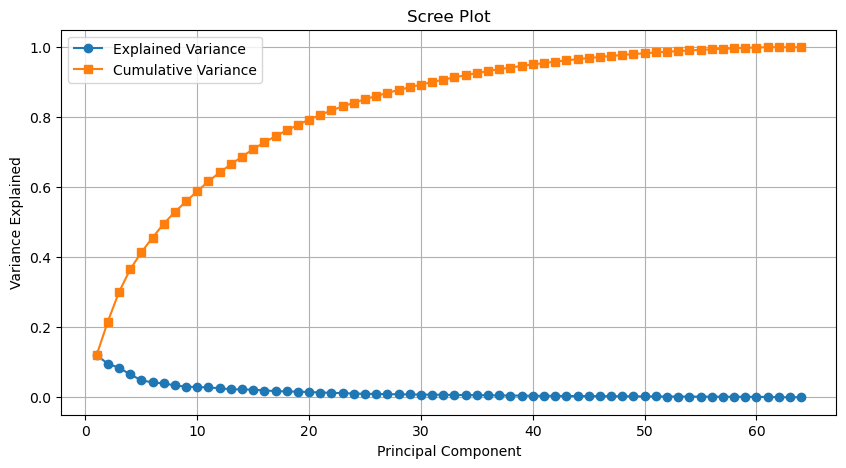

In [10]:
# Select numeric columns for PCA
data = df.drop('target', axis=1)

# Standardize the data
scaler = StandardScaler()
data_std = scaler.fit_transform(data)

# Compute covariance matrix
cov_matrix = np.cov(data_std, rowvar=False)

# Eigen decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues and eigenvectors
eigenpairs = [(np.abs(eigenvalues[i]), eigenvectors[:, i]) for i in range(len(eigenvalues))]
eigenpairs.sort(key=lambda x: x[0], reverse=True)

# Explained variance
explained_variance = [(i / sum(eigenvalues)) for i in sorted(eigenvalues, reverse=True)]
cumulative_variance = np.cumsum(explained_variance)

# Scree Plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, 'o-', label='Explained Variance')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 's-', label='Cumulative Variance')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.legend()
plt.grid()
plt.show()

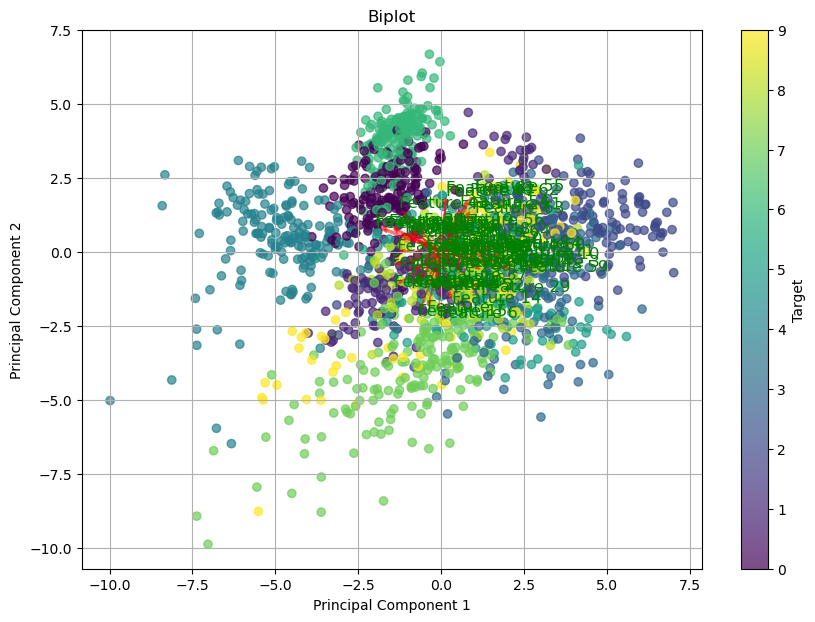

In [12]:
# Project data onto the first two principal components
pca_components = np.array([pair[1] for pair in eigenpairs])
projected_data = data_std @ pca_components.T

# Biplot
plt.figure(figsize=(10, 7))
pca1, pca2 = projected_data[:, 0], projected_data[:, 1]
plt.scatter(pca1, pca2, alpha=0.7, c=df['target'], cmap='viridis')

# Add eigenvector arrows
for i in range(eigenvectors.shape[1]):
    plt.arrow(0, 0, eigenvectors[i, 0] * max(pca1), eigenvectors[i, 1] * max(pca2),
              color='r', alpha=0.5, head_width=0.1)
    plt.text(eigenvectors[i, 0] * max(pca1) * 1.2, eigenvectors[i, 1] * max(pca2) * 1.2,
             f'Feature {i + 1}', color='g', fontsize=12)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Biplot')
plt.grid()
plt.colorbar(label="Target")
plt.show()

In [ ]:
from sklearn.decomposition import PCA

# Initialize and fit PCA
pca = PCA()
pca_result = pca.fit_transform(data_std)

# Plot explained variance ratio
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA Explained Variance Ratio')
plt.grid()
plt.show()

# Plot first two principal components
plt.figure(figsize=(10, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1], 
           c=df['target'], cmap='viridis', alpha=0.7)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Results - First Two Components')
plt.colorbar(label='Target')
plt.grid()
plt.show()